# iM 뱅크 데이터 전처리

# 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/iMBANK_CARD_DATA_2021(K-DigitalTraining).csv', encoding='cp949')
df1=pd.read_csv('/content/drive/MyDrive/iMBANK_CARD_DATA_2022(K-DigitalTraining).csv', encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/iMBANK_CARD_DATA_2023(K-DigitalTraining).csv', encoding='cp949')
df3=pd.read_csv('/content/drive/MyDrive/iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', encoding='cp949')
df4=pd.read_csv('/content/drive/MyDrive/iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', encoding='cp949')
df5=pd.read_csv('/content/drive/MyDrive/iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv', encoding='cp949')

In [ ]:
df.shape

(60672642, 7)

In [ ]:
df1.shape

(62945850, 7)

In [ ]:
df2.shape

(64829377, 7)

In [ ]:
df3.shape

(20835992, 13)

In [ ]:
df4.shape

(21578686, 13)

In [ ]:
df5.shape

(22739682, 13)

In [ ]:
df4.head(5)

,기준년월,고객ID,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202212,9999998161,60대이상,여,일반등급,대구광역시,달서구,600000,0,0,0,0,0
1,202212,9999997589,60대이상,남,일반등급,경상북도,경주시,0,0,0,0,0,0
2,202212,9999991579,60대이상,여,일반등급,경상북도,성주군,0,33000000,0,0,0,0
3,202212,9999989448,60대이상,남,일반등급,대구광역시,달서구,400000,0,0,0,0,0
4,202212,9999988325,60대이상,남,일반등급,대구광역시,달서구,2700000,0,0,0,0,0


# 병합

In [ ]:
import pandas as pd

# 카드 데이터 병합
card_df = pd.concat([df, df1, df2], ignore_index=True)
card_df.columns = card_df.columns.str.strip()  # 혹시 모를 공백 제거

# 고객 데이터 병합
customer_df = pd.concat([df3, df4, df5], ignore_index=True)
customer_df.columns = customer_df.columns.str.strip()  # 혹시 모를 공백 제거

# 데이터 형태 확인
print("✅ 카드 데이터 shape:", card_df.shape)
print("✅ 고객 데이터 shape:", customer_df.shape)

# 확인용 샘플 출력
print(card_df.head(2))
print(customer_df.head(2))


✅ 카드 데이터 shape: (188447869, 7)
✅ 고객 데이터 shape: (65154360, 13)
     거래년월        고객ID 가맹점업종명 가맹점_광역시도 가맹점_시군구  승인건수   승인금액
0  202112  4080934272   일반한식     경상북도     경주시  5번이하  20000
1  202112  4116127380   일반한식     경상북도     경주시  5번이하  20000
     기준년월        고객ID    연령대 성별  고객등급  자택_시도 자택_시군구  수신_요구불예금  수신_거치식예금  \
0  202112  9999998161  60대이상  여  일반등급  대구광역시    달서구   1400000         0   
1  202112  9999997589  60대이상  남  일반등급   경상북도    경주시         0  10000000   

   수신_적립식예금  수신_펀드  수신_외화예금  대출금액  
0         0      0        0     0  
1    500000      0        0     0  


# 결측치 확인

In [ ]:
# 컬럼별 결측값 비율(%) 출력
missing_ratio = (card_df.isnull().sum() / len(card_df)) * 100
missing_ratio = missing_ratio.sort_values(ascending=False)  # 결측 비율이 높은 순으로 정렬
print(missing_ratio)

가맹점_시군구     0.053092
고객ID        0.000000
거래년월        0.000000
가맹점업종명      0.000000
가맹점_광역시도    0.000000
승인건수        0.000000
승인금액        0.000000
dtype: float64


In [ ]:
# 컬럼별 결측값 개수 출력
missing_count = card_df.isnull().sum()
missing_count = missing_count.sort_values(ascending=False)  # 결측치 많은 순으로 정렬
print(missing_count)


가맹점_시군구     100050
고객ID             0
거래년월             0
가맹점업종명           0
가맹점_광역시도         0
승인건수             0
승인금액             0
dtype: int64


In [ ]:
card_df['가맹점_시군구'].value_counts()

,count
가맹점_시군구,
중구,24723563
달서구,23417130
수성구,20434485
북구,17720240
동구,13849283
...,...
동두천시,295
화순군,293
장성군,284


In [ ]:
# 가맹점_시군구가 NaN인 행 제거
card_df = card_df.dropna(subset=['가맹점_시군구'])

# 결과 확인
print("✅ 결측 제거 후 shape:", card_df.shape)
print("📌 가맹점_시군구 결측 개수:", card_df['가맹점_시군구'].isnull().sum())


✅ 결측 제거 후 shape: (188347819, 7)
📌 가맹점_시군구 결측 개수: 0


In [ ]:
# 컬럼별 결측값 개수 출력
missing_count = customer_df.isnull().sum()
missing_count = missing_count.sort_values(ascending=False)  # 결측치 많은 순으로 정렬
print(missing_count)


자택_시군구      65674
고객ID            0
연령대             0
성별              0
기준년월            0
고객등급            0
자택_시도           0
수신_요구불예금        0
수신_거치식예금        0
수신_적립식예금        0
수신_펀드           0
수신_외화예금         0
대출금액            0
dtype: int64


In [ ]:
# 자택_시군구가 NaN인 행 제거
customer_df = customer_df.dropna(subset=['자택_시군구'])

# 결과 확인
print("✅ 결측 제거 후 shape:", customer_df.shape)
print("📌 자택_시군구 결측 개수:", customer_df['자택_시군구'].isnull().sum())


✅ 결측 제거 후 shape: (65088686, 13)
📌 자택_시군구 결측 개수: 0


# 최종 병합

In [ ]:
# 최종 병합 (고객ID + 거래년월 == 기준년월)
df_merged_all = pd.merge(card_df, customer_df, how='left',
                       left_on=['고객ID', '거래년월'],
                       right_on=['고객ID', '기준년월'])

In [ ]:
# 기준년월은 거래년월과 같으므로 제거
df_merged_all.drop(columns=['기준년월'], inplace=True)


In [ ]:
df_merged_all.shape

(188347819, 18)

In [ ]:
# 컬럼별 결측값 개수 출력
missing_count = df_merged_all.isnull().sum()
missing_count = missing_count.sort_values(ascending=False)  # 결측치 많은 순으로 정렬
print(missing_count)


고객등급        7861803
성별          7861803
수신_외화예금     7861803
수신_펀드       7861803
연령대         7861803
수신_적립식예금    7861803
수신_거치식예금    7861803
수신_요구불예금    7861803
자택_시군구      7861803
자택_시도       7861803
대출금액        7861803
거래년월              0
고객ID              0
승인금액              0
가맹점업종명            0
가맹점_광역시도          0
가맹점_시군구           0
승인건수              0
dtype: int64


In [ ]:
# 결측치가 있는 주요 컬럼 리스트 정의
missing_cols = [
    '고객등급', '성별', '연령대', '자택_시군구', '자택_시도',
    '수신_요구불예금', '수신_거치식예금', '수신_적립식예금',
    '수신_펀드', '수신_외화예금', '대출금액'
]

# 해당 컬럼들에 하나라도 NaN이 있는 행 제거
df_merged_all = df_merged_all.dropna(subset=missing_cols)

# 결과 확인
print("✅ 결측 제거 후 shape:", df_merged_all.shape)
print("📌 남은 결측 개수 (확인용):")
print(df_merged_all[missing_cols].isnull().sum())


✅ 결측 제거 후 shape: (180486016, 18)
📌 남은 결측 개수 (확인용):
고객등급        0
성별          0
연령대         0
자택_시군구      0
자택_시도       0
수신_요구불예금    0
수신_거치식예금    0
수신_적립식예금    0
수신_펀드       0
수신_외화예금     0
대출금액        0
dtype: int64


In [ ]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180486016 entries, 0 to 188347818
Data columns (total 18 columns):
 #   Column    Dtype  
---  ------    -----  
 0   거래년월      int64  
 1   고객ID      int64  
 2   가맹점업종명    object 
 3   가맹점_광역시도  object 
 4   가맹점_시군구   object 
 5   승인건수      object 
 6   승인금액      int64  
 7   연령대       object 
 8   성별        object 
 9   고객등급      object 
 10  자택_시도     object 
 11  자택_시군구    object 
 12  수신_요구불예금  float64
 13  수신_거치식예금  float64
 14  수신_적립식예금  float64
 15  수신_펀드     float64
 16  수신_외화예금   float64
 17  대출금액      float64
dtypes: float64(6), int64(3), object(9)
memory usage: 25.5+ GB


In [ ]:
df_merged_all.to_csv('/content/drive/MyDrive/df_merged_all.csv', index=False)

# Load

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_merged_all=pd.read_csv('/content/drive/MyDrive/df_merged_all.csv', encoding='utf-8-sig')

# EDA

In [ ]:
df_merged_all.head(5)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,수신_외화예금,대출금액
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000,20대,여,일반등급,경상북도,경주시,2400000.0,0.0,3100000.0,0.0,0.0,0.0
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000,20대,여,일반등급,울산광역시,울주군,200000.0,0.0,0.0,0.0,0.0,0.0
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000,20대,여,일반등급,경상북도,경산시,100000.0,0.0,0.0,0.0,0.0,0.0
3,202112,2950007638,일반한식,경상북도,경주시,5번이하,60000,10대미만,남,일반등급,경상북도,경주시,100000.0,0.0,0.0,0.0,0.0,0.0
4,202112,2931907302,일반한식,경상북도,경주시,5번이하,10000,20대,남,일반등급,경상북도,경주시,4400000.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_merged_all['승인건수'].unique()

array(['5번이하', '5번초과 10번이하', '15번초과 20번이하', '10번초과 15번이하', '20번 초과'],
      dtype=object)

In [4]:
# 고객등급 값의 비율 계산 (normalize=True → 비율)
grade_ratio = df_merged_all['고객등급'].value_counts(normalize=True, dropna=False)

# 백분율로 보기 좋게 정리
grade_ratio = (grade_ratio * 100).round(2)

# 출력
print("📊 고객등급 분포 비율 (%):")
print(grade_ratio)


📊 고객등급 분포 비율 (%):
고객등급
일반등급     92.95
우수등급      6.85
최우수등급     0.20
Name: proportion, dtype: float64


# 칼럼 제거

In [ ]:
# '가맹점업종명' 컬럼 제거
df_merged_all.drop(columns=['가맹점업종명'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '가맹점_광역시도', '가맹점_시군구', '승인건수', '승인금액', '연령대', '성별',
       '고객등급', '자택_시도', '자택_시군구', '수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드',
       '수신_외화예금', '대출금액'],
      dtype='object')


In [ ]:
# '가맹점_광역시도' 컬럼 제거
df_merged_all.drop(columns=['가맹점_광역시도'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '가맹점_시군구', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도',
       '자택_시군구', '수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금',
       '대출금액'],
      dtype='object')


In [ ]:
# '가맹점_시군구' 컬럼 제거
df_merged_all.drop(columns=['가맹점_시군구'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구',
       '수신_요구불예금', '수신_거치식예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액'],
      dtype='object')


In [ ]:
# '수신_거치식예금' 컬럼 제거
df_merged_all.drop(columns=['수신_거치식예금'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구',
       '수신_요구불예금', '수신_적립식예금', '수신_펀드', '수신_외화예금', '대출금액'],
      dtype='object')


In [ ]:
# '수신_적립식예금' 컬럼 제거
df_merged_all.drop(columns=['수신_적립식예금'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구',
       '수신_요구불예금', '수신_펀드', '수신_외화예금', '대출금액'],
      dtype='object')


In [ ]:
# '수신_외화예금' 컬럼 제거
df_merged_all.drop(columns=['수신_외화예금'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구',
       '수신_요구불예금', '수신_펀드', '대출금액'],
      dtype='object')


In [ ]:
# '수신_펀드' 컬럼 제거
df_merged_all.drop(columns=['수신_펀드'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구',
       '수신_요구불예금', '대출금액'],
      dtype='object')


In [ ]:
# '자택_시군구' 컬럼 제거
df_merged_all.drop(columns=['자택_시군구'], inplace=True)
# 결과 확인
print(df_merged_all.columns)

Index(['거래년월', '고객ID', '승인건수', '승인금액', '연령대', '성별', '고객등급', '자택_시도',
       '수신_요구불예금', '대출금액'],
      dtype='object')


# 거주시도명 칼럼 수정

In [ ]:
df_merged_all['자택_시도'].unique()

array(['경상북도', '울산광역시', '대구광역시', '서울특별시', '대전광역시', '충청북도', '경상남도',
       '부산광역시', '경기도', '충청남도', '강원특별자치도', '인천광역시', '제주특별자치도', '전북특별자치도',
       '광주광역시', '전라남도'], dtype=object)

In [ ]:
# 1. 값 매핑을 위한 딕셔너리
sido_map = {
    '경상북도': '경북',
    '울산광역시': '울산',
    '대구광역시': '대구',
    '서울특별시': '서울',
    '대전광역시': '대전',
    '충청북도': '충북',
    '경상남도': '경남',
    '부산광역시': '부산',
    '경기도': '경기',
    '충청남도': '충남',
    '강원특별자치도': '강원',
    '인천광역시': '인천',
    '제주특별자치도': '제주',
    '전북특별자치도': '전북',
    '광주광역시': '광주',
    '전라남도': '전남'
}

# 2. 값 변경
df_merged_all['자택_시도'] = df_merged_all['자택_시도'].map(sido_map)

# 3. 컬럼명 변경
df_merged_all.rename(columns={'자택_시도': '거주시도명'}, inplace=True)

# 결과 확인
print(df_merged_all['거주시도명'].unique())


['경북' '울산' '대구' '서울' '대전' '충북' '경남' '부산' '경기' '충남' '강원' '인천' '제주' '전북'
 '광주' '전남']


In [ ]:
df_merged_all.head(5)

,거래년월,고객ID,승인건수,승인금액,연령대,성별,고객등급,거주시도명,수신_요구불예금,대출금액
0,202112,4080934272,5번이하,20000,20대,여,일반등급,경북,2400000.0,0.0
1,202112,4116127380,5번이하,20000,20대,여,일반등급,울산,200000.0,0.0
2,202112,2914424833,5번이하,20000,20대,여,일반등급,경북,100000.0,0.0
3,202112,2950007638,5번이하,60000,10대미만,남,일반등급,경북,100000.0,0.0
4,202112,2931907302,5번이하,10000,20대,남,일반등급,경북,4400000.0,0.0


# datetime 변환

In [ ]:
# '거래년월'을 문자열로 변환한 뒤 datetime 처리
df_merged_all['거래년월'] = pd.to_datetime(df_merged_all['거래년월'].astype(str), format='%Y%m')

In [ ]:
df_merged_all['거래년월'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 180486016 entries, 0 to 180486015
Series name: 거래년월
Non-Null Count      Dtype         
--------------      -----         
180486016 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 GB


# 라벨 인코딩

In [ ]:
# 승인건수 지정 인코딩
usage_map = {
    '5번이하': 0,
    '5번초과 10번이하': 1,
    '10번초과 15번이하': 2,
    '15번초과 20번이하': 3,
    '20번 초과': 4,
}
df_merged_all['승인건수'] = df_merged_all['승인건수'].map(usage_map)

# 연령대 지정 인코딩
age_map = {
    '10대미만': 0,
    '20대': 1,
    '30대': 2,
    '40대': 3,
    '50대': 4,
    '60대이상': 5
}
df_merged_all['연령대'] = df_merged_all['연령대'].map(age_map)

# 고객등급 지정 인코딩
grade_map = {
    '최우수등급': 0,
    '우수등급': 1,
    '일반등급': 2
}
df_merged_all['고객등급'] = df_merged_all['고객등급'].map(grade_map)


In [ ]:
# 고객등급 지정 인코딩 // 바꿔가면서 테스트
sex_map = {
    '남': 1,
    '여': 0
}
df_merged_all['성별'] = df_merged_all['성별'].map(sex_map)
# 3. 컬럼명 변경
df_merged_all.rename(columns={'성별': '남녀구분코드'}, inplace=True)

In [ ]:
df_merged_all.head(5)

,거래년월,고객ID,승인건수,승인금액,연령대,남녀구분코드,고객등급,거주시도명,수신_요구불예금,대출금액
0,2021-12-01,4080934272,0,20000,1,1,2,경북,2400000.0,0.0
1,2021-12-01,4116127380,0,20000,1,1,2,울산,200000.0,0.0
2,2021-12-01,2914424833,0,20000,1,1,2,경북,100000.0,0.0
3,2021-12-01,2950007638,0,60000,0,0,2,경북,100000.0,0.0
4,2021-12-01,2931907302,0,10000,1,0,2,경북,4400000.0,0.0


In [ ]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180486016 entries, 0 to 180486015
Data columns (total 10 columns):
 #   Column    Dtype         
---  ------    -----         
 0   거래년월      datetime64[ns]
 1   고객ID      int64         
 2   승인건수      float64       
 3   승인금액      int64         
 4   연령대       int64         
 5   남녀구분코드    int64         
 6   고객등급      float64       
 7   거주시도명     object        
 8   수신_요구불예금  float64       
 9   대출금액      float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 13.4+ GB


In [ ]:
# 컬럼별 결측값 개수 출력
missing_count = df_merged_all.isnull().sum()
missing_count = missing_count.sort_values(ascending=False)  # 결측치 많은 순으로 정렬
print(missing_count)


거래년월        0
고객ID        0
승인건수        0
승인금액        0
연령대         0
남녀구분코드      0
고객등급        0
수신_요구불예금    0
대출금액        0
거주시도명_경기    0
거주시도명_경남    0
거주시도명_경북    0
거주시도명_광주    0
거주시도명_대구    0
거주시도명_대전    0
거주시도명_부산    0
거주시도명_서울    0
거주시도명_울산    0
거주시도명_인천    0
거주시도명_전남    0
거주시도명_전북    0
거주시도명_제주    0
거주시도명_충남    0
거주시도명_충북    0
dtype: int64


# 원핫 인코딩

In [ ]:
onehot_cols = ['거주시도명']

df_merged_all = pd.get_dummies(df_merged_all, columns=onehot_cols, drop_first=True)


In [ ]:
print("✅ 최종 인코딩된 데이터 shape:", df_merged_all.shape)
print(df_merged_all.head(2))


✅ 최종 인코딩된 데이터 shape: (180486016, 24)
        거래년월        고객ID  승인건수   승인금액  연령대  남녀구분코드  고객등급   수신_요구불예금  대출금액  \
0 2021-12-01  4080934272     0  20000    1       1     2  2400000.0   0.0   
1 2021-12-01  4116127380     0  20000    1       1     2   200000.0   0.0   

   거주시도명_경기  ...  거주시도명_대전  거주시도명_부산  거주시도명_서울  거주시도명_울산  거주시도명_인천  거주시도명_전남  \
0     False  ...     False     False     False     False     False     False   
1     False  ...     False     False     False      True     False     False   

   거주시도명_전북  거주시도명_제주  거주시도명_충남  거주시도명_충북  
0     False     False     False     False  
1     False     False     False     False  

[2 rows x 24 columns]


In [ ]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180486016 entries, 0 to 180486015
Data columns (total 24 columns):
 #   Column    Dtype         
---  ------    -----         
 0   거래년월      datetime64[ns]
 1   고객ID      int64         
 2   승인건수      int64         
 3   승인금액      int64         
 4   연령대       int64         
 5   남녀구분코드    int64         
 6   고객등급      int64         
 7   수신_요구불예금  float64       
 8   대출금액      float64       
 9   거주시도명_경기  bool          
 10  거주시도명_경남  bool          
 11  거주시도명_경북  bool          
 12  거주시도명_광주  bool          
 13  거주시도명_대구  bool          
 14  거주시도명_대전  bool          
 15  거주시도명_부산  bool          
 16  거주시도명_서울  bool          
 17  거주시도명_울산  bool          
 18  거주시도명_인천  bool          
 19  거주시도명_전남  bool          
 20  거주시도명_전북  bool          
 21  거주시도명_제주  bool          
 22  거주시도명_충남  bool          
 23  거주시도명_충북  bool          
dtypes: bool(15), datetime64[ns](1), float64(2), int64(6)
memory usage: 14.6 GB


In [ ]:
# 조건을 함수로 정의
def has_decimal_first_digit_between_1_and_9(x):
    if pd.isna(x):
        return False
    decimal_part = x - int(x)
    first_decimal_digit = int(decimal_part * 10) % 10
    return 1 <= first_decimal_digit <= 9

# 두 컬럼에서 해당 조건을 만족하는 값 필터링
mask_요구불 = df_merged_all['수신_요구불예금'].apply(has_decimal_first_digit_between_1_and_9)
mask_대출 = df_merged_all['대출금액'].apply(has_decimal_first_digit_between_1_and_9)

# 결과 확인
요구불_소수있는값 = df_merged_all[mask_요구불]
대출_소수있는값 = df_merged_all[mask_대출]

# 개수 출력
print("✅ 수신_요구불예금 - 소수 첫째자리가 1~9인 값 개수:", 요구불_소수있는값.shape[0])
print("✅ 대출금액 - 소수 첫째자리가 1~9인 값 개수:", 대출_소수있는값.shape[0])


✅ 수신_요구불예금 - 소수 첫째자리가 1~9인 값 개수: 0
✅ 대출금액 - 소수 첫째자리가 1~9인 값 개수: 0


In [ ]:
# float64 타입인 컬럼만 선택
float_cols = df_merged_all.select_dtypes(include=['float64']).columns

# 해당 컬럼들을 int64로 변환
df_merged_all[float_cols] = df_merged_all[float_cols].astype('int64')

# 결과 확인
print(df_merged_all[float_cols].dtypes)


수신_요구불예금    int64
대출금액        int64
dtype: object


In [ ]:
#bool_cols = df_merged_all.select_dtypes(include='bool').columns
#df_merged_all[bool_cols] = df_merged_all[bool_cols].astype('int64')

In [ ]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180486016 entries, 0 to 180486015
Data columns (total 24 columns):
 #   Column    Dtype         
---  ------    -----         
 0   거래년월      datetime64[ns]
 1   고객ID      int64         
 2   승인건수      int64         
 3   승인금액      int64         
 4   연령대       int64         
 5   남녀구분코드    int64         
 6   고객등급      int64         
 7   수신_요구불예금  int64         
 8   대출금액      int64         
 9   거주시도명_경기  bool          
 10  거주시도명_경남  bool          
 11  거주시도명_경북  bool          
 12  거주시도명_광주  bool          
 13  거주시도명_대구  bool          
 14  거주시도명_대전  bool          
 15  거주시도명_부산  bool          
 16  거주시도명_서울  bool          
 17  거주시도명_울산  bool          
 18  거주시도명_인천  bool          
 19  거주시도명_전남  bool          
 20  거주시도명_전북  bool          
 21  거주시도명_제주  bool          
 22  거주시도명_충남  bool          
 23  거주시도명_충북  bool          
dtypes: bool(15), datetime64[ns](1), int64(8)
memory usage: 14.6 GB


In [ ]:
df_merged_all.to_csv('/content/drive/MyDrive/iM뱅크전처리.csv', index=False)

In [ ]:
test_df=df_merged_all.copy()

# 모델링

## 테스트 파일 & 모델링 파일 불러오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
test_df=pd.read_csv('/content/drive/MyDrive/iM뱅크전처리.csv', encoding='utf-8-sig')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180486016 entries, 0 to 180486015
Data columns (total 24 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      object
 1   고객ID      int64 
 2   승인건수      int64 
 3   승인금액      int64 
 4   연령대       int64 
 5   남녀구분코드    int64 
 6   고객등급      int64 
 7   수신_요구불예금  int64 
 8   대출금액      int64 
 9   거주시도명_경기  bool  
 10  거주시도명_경남  bool  
 11  거주시도명_경북  bool  
 12  거주시도명_광주  bool  
 13  거주시도명_대구  bool  
 14  거주시도명_대전  bool  
 15  거주시도명_부산  bool  
 16  거주시도명_서울  bool  
 17  거주시도명_울산  bool  
 18  거주시도명_인천  bool  
 19  거주시도명_전남  bool  
 20  거주시도명_전북  bool  
 21  거주시도명_제주  bool  
 22  거주시도명_충남  bool  
 23  거주시도명_충북  bool  
dtypes: bool(15), int64(8), object(1)
memory usage: 14.6+ GB


In [ ]:
# 고객등급 비율 (%) 확인
grade_ratio = test_df['고객등급'].value_counts(normalize=True) * 100
print(grade_ratio.sort_index())  # 등급 순으로 정렬하려면 sort_index()


고객등급
0     0.198858
1     6.850464
2    92.950678
Name: proportion, dtype: float64


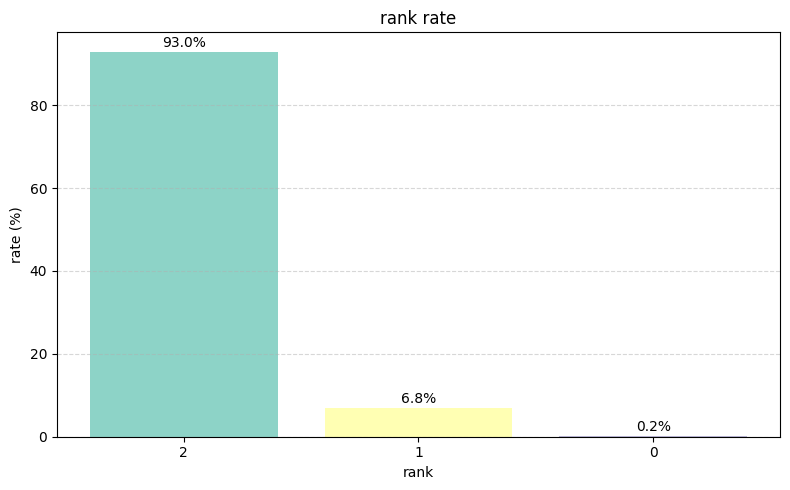

In [7]:
import matplotlib.pyplot as plt

# 고객등급 비율 계산
grade_ratio = test_df['고객등급'].value_counts(normalize=True, dropna=False)
grade_ratio = (grade_ratio * 100).round(2)

# NaN → 문자열로 변환 (그래프에 표시되게)
grade_ratio.index = grade_ratio.index.astype(str)

# 🎨 막대마다 다른 색상 지정 (필요 시 색 개수 늘리기)
colors = plt.cm.Set3(range(len(grade_ratio)))  # 예: Set3 컬러맵 활용

# 막대그래프 그리기
plt.figure(figsize=(8, 5))
bars = plt.bar(grade_ratio.index, grade_ratio.values, color=colors)
plt.xlabel('rank')
plt.ylabel('rate (%)')
plt.title('rank rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 퍼센트 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
고객등급
0    0.04
1    0.01

2    5.32

3   14.55
4   80.09
Name: proportion, dtype: float64

In [9]:
# 먼저 설치 필요 (Colab이나 Jupyter 환경에서는 아래 실행 필요)
!pip install xgboost catboost lightgbm --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.6 MB/s eta 0:00:00


In [10]:
import pickle
with open('/content/drive/MyDrive/open/voting_model(D)','rb') as f: #voting, stacking, bagging,rf
    voting_dlf= pickle.load(f)

In [ ]:
test_df

,거래년월,고객ID,승인건수,승인금액,연령대,남녀구분코드,고객등급,수신_요구불예금,대출금액,거주시도명_경기,...,거주시도명_대전,거주시도명_부산,거주시도명_서울,거주시도명_울산,거주시도명_인천,거주시도명_전남,거주시도명_전북,거주시도명_제주,거주시도명_충남,거주시도명_충북
0,2021-12-01,4080934272,0,20000,1,1,2,2400000,0,False,...,False,False,False,False,False,False,False,False,False,False
1,2021-12-01,4116127380,0,20000,1,1,2,200000,0,False,...,False,False,False,True,False,False,False,False,False,False
2,2021-12-01,2914424833,0,20000,1,1,2,100000,0,False,...,False,False,False,False,False,False,False,False,False,False
3,2021-12-01,2950007638,0,60000,0,0,2,100000,0,False,...,False,False,False,False,False,False,False,False,False,False
4,2021-12-01,2931907302,0,10000,1,0,2,4400000,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180486011,2023-01-01,7210942935,0,50000,4,1,2,3600000,0,False,...,False,False,False,False,False,False,False,False,False,False
180486012,2023-01-01,3857466791,0,20000,4,0,2,900000,0,False,...,False,False,False,False,False,False,False,False,False,False
180486013,2023-01-01,4075163762,0,40000,0,0,2,0,0,False,...,False,False,False,False,False,False,False,False,False,False
180486014,2023-01-01,2956984953,0,10000,1,0,2,7700000,0,False,...,False,False,False,False,False,False,False,False,False,False


## 학습 데이터에 맞게 정리

In [ ]:
eval_df = test_df.copy()

In [ ]:
print(voting_dlf.feature_names_in_)

['승인건수' '승인금액' '연령대' '남녀구분코드' '수신_요구불예금' '대출금액' '거주시도명_경기' '거주시도명_경남'
 '거주시도명_경북' '거주시도명_광주' '거주시도명_대구' '거주시도명_대전' '거주시도명_부산' '거주시도명_서울'
 '거주시도명_울산' '거주시도명_인천' '거주시도명_전남' '거주시도명_전북' '거주시도명_제주' '거주시도명_충남'
 '거주시도명_충북']


In [ ]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180486016 entries, 0 to 180486015
Data columns (total 24 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      object
 1   고객ID      int64 
 2   승인건수      int64 
 3   승인금액      int64 
 4   연령대       int64 
 5   남녀구분코드    int64 
 6   고객등급      int64 
 7   수신_요구불예금  int64 
 8   대출금액      int64 
 9   거주시도명_경기  bool  
 10  거주시도명_경남  bool  
 11  거주시도명_경북  bool  
 12  거주시도명_광주  bool  
 13  거주시도명_대구  bool  
 14  거주시도명_대전  bool  
 15  거주시도명_부산  bool  
 16  거주시도명_서울  bool  
 17  거주시도명_울산  bool  
 18  거주시도명_인천  bool  
 19  거주시도명_전남  bool  
 20  거주시도명_전북  bool  
 21  거주시도명_제주  bool  
 22  거주시도명_충남  bool  
 23  거주시도명_충북  bool  
dtypes: bool(15), int64(8), object(1)
memory usage: 14.6+ GB


In [ ]:
# '거래년월'을 datetime으로 변환 후, 연-월까지만 남기기
eval_df['거래년월'] = pd.to_datetime(eval_df['거래년월'], errors='coerce').dt.to_period('M').dt.to_timestamp()

## 모델 예측

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 거래년월을 datetime으로 변환
eval_df['거래년월'] = pd.to_datetime(eval_df['거래년월'], errors='coerce')

# 모델 학습에 사용했던 피처 중에서,
# eval_df에 존재하고, 수치형이며, datetime은 제외한 컬럼만 추출
common_cols = [
    col for col in voting_dlf.feature_names_in_
    if col in eval_df.columns
    and pd.api.types.is_numeric_dtype(eval_df[col])
    and not pd.api.types.is_datetime64_any_dtype(eval_df[col])
]

# 예측용 데이터 구성
X_eval = eval_df[common_cols]

# 예측
preds = voting_dlf.predict(X_eval)
eval_df['고객등급_예측'] = preds

# 5단계 → 3단계로 리매핑
def remap_grades(preds):
    return pd.Series(preds).map(lambda x: 0 if x in [0, 1] else 1 if x == 2 else 2)

eval_df['고객등급_예측_리매핑'] = remap_grades(eval_df['고객등급_예측'])

# 성능 평가 (실제값: '고객등급', 예측값: '고객등급_예측_리매핑')
print("Accuracy:", accuracy_score(eval_df['고객등급'], eval_df['고객등급_예측_리매핑']))
print("Classification Report:\n", classification_report(eval_df['고객등급'], eval_df['고객등급_예측_리매핑']))


Accuracy: 0.23004995024102035
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.01      0.00    358911
           1       0.08      0.92      0.14  12364130
           2       0.97      0.18      0.30 167762975

    accuracy                           0.23 180486016
   macro avg       0.35      0.37      0.15 180486016
weighted avg       0.91      0.23      0.29 180486016

